In [5]:
import pandas as pd
import matplotlib.pyplot as plt

binary_path = "../reports/tables/performance_ctg_binary.csv"
df_binary = pd.read_csv(binary_path)

multi_path = "../reports/tables/performance_ctg_multiclass.csv"
df_multi = pd.read_csv(multi_path)

feat_path = "../reports/tables/logistic_feature_importance_long.csv"
df_feat = pd.read_csv(feat_path)


In [6]:
df_binary

,task,model,accuracy,f1,sensitivity,specificity,ppv,npv,prevalence,auc
0,highrisk_vs_normal,logistic_multinomial,0.934272,0.862745,0.926316,0.936556,0.807339,0.977918,0.223005,0.981301
1,highrisk_vs_normal,xgboost_multiclass,0.967136,0.925532,0.915789,0.981873,0.935484,0.975976,0.223005,0.991445


In [7]:
df_multi

,model,accuracy,macro_precision,macro_recall,macro_f1,weighted_f1,precision_cls1,recall_cls1,f1_cls1,precision_cls2,recall_cls2,f1_cls2,precision_cls3,recall_cls3,f1_cls3
0,logistic_multinomial,0.906103,0.796485,0.860679,0.825113,0.909195,0.977918,0.936556,0.956790,0.661538,0.728814,0.693548,0.750000,0.916667,0.825000
1,xgboost_multiclass,0.957746,0.926690,0.918942,0.922729,0.957432,0.975976,0.981873,0.978916,0.859649,0.830508,0.844828,0.944444,0.944444,0.944444


In [8]:
df_feat.head()

,class,feature,coef,odds_ratio,abs_coef
0,1,baseline value,-0.315755,0.729238,0.315755
1,1,accelerations,2.416457,11.206089,2.416457
2,1,fetal_movement,-0.622669,0.536511,0.622669
3,1,uterine_contractions,0.667749,1.949843,0.667749
4,1,light_decelerations,-0.050387,0.950861,0.050387


이진 분류에서 모델별 주요 지표

<Figure size 800x500 with 0 Axes>

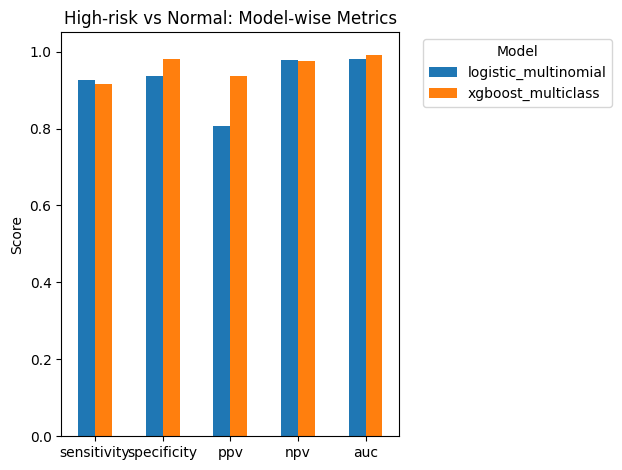

In [9]:
metrics = ["sensitivity", "specificity", "ppv", "npv", "auc"]

plot_df_bin = df_binary.set_index("model")[metrics].T

plt.figure(figsize=(8, 5))
plot_df_bin.plot(kind="bar")
plt.title("High-risk vs Normal: Model-wise Metrics")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


3-class에서 클래스별 F1 score 비교(bar plot)

<Figure size 800x500 with 0 Axes>

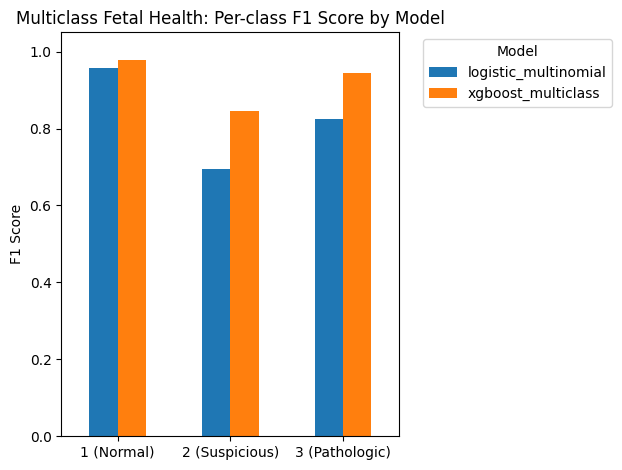

In [11]:
f1_cols = ["f1_cls1", "f1_cls2", "f1_cls3"]
plot_df_multi = df_multi.set_index("model")[f1_cols].T

class_labels = ["1 (Normal)", "2 (Suspicious)", "3 (Pathologic)"]
plot_df_multi.index = class_labels

plt.figure(figsize=(8, 5))
plot_df_multi.plot(kind="bar")
plt.title("Multiclass Fetal Health: Per-class F1 Score by Model")
plt.ylabel("F1 Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()


병적(class=3)에서 feature odds ratio 상위 중요도(hbar)

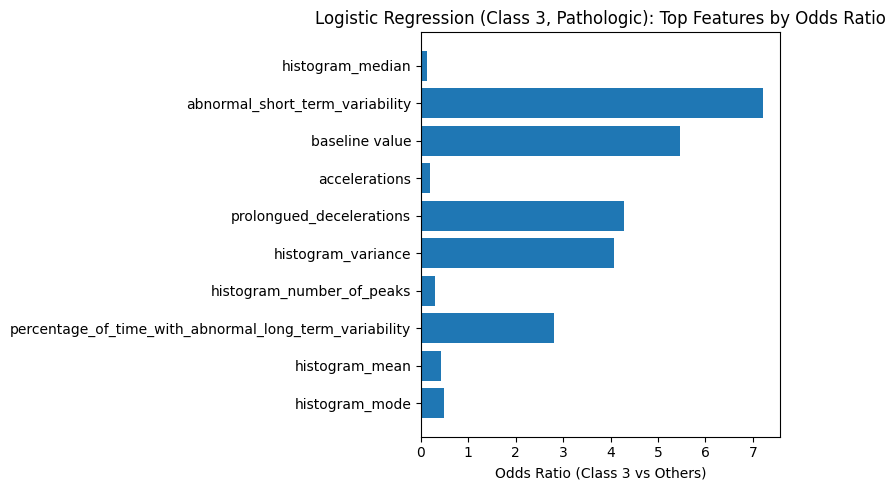

In [12]:
df_pathologic = df_feat[df_feat["class"] == 3].copy()


N = 10
df_top = df_pathologic.sort_values("abs_coef", ascending=False).head(N)


df_top = df_top.iloc[::-1]

plt.figure(figsize=(8, 5))
plt.barh(df_top["feature"], df_top["odds_ratio"])
plt.xlabel("Odds Ratio (Class 3 vs Others)")
plt.title("Logistic Regression (Class 3, Pathologic): Top Features by Odds Ratio")
plt.tight_layout()
plt.show()
